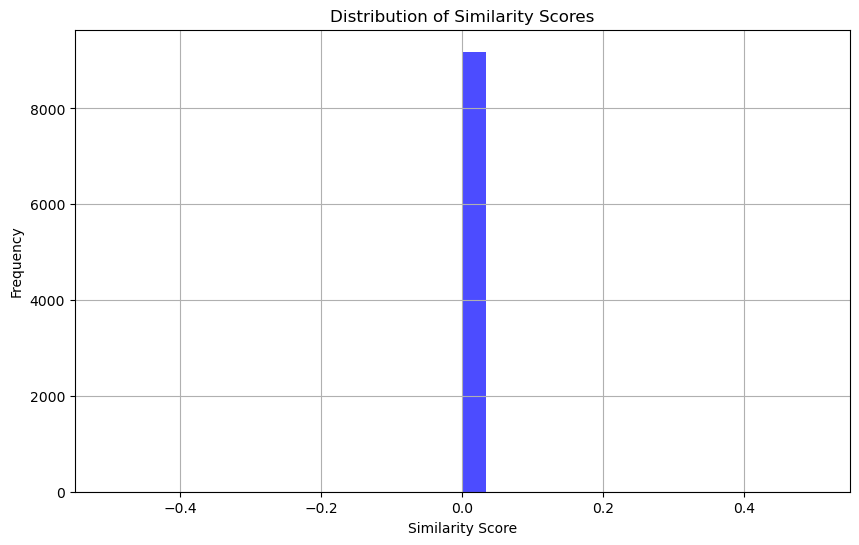

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load the dataset
try:
    # Try reading with UTF-8 first
    data = pd.read_csv('../select_db/data_mapping_filtered.csv')
except UnicodeDecodeError:
    # If a UnicodeDecodeError occurs, try a different encoding
    data = pd.read_csv('../select_db/data_mapping_filtered.csv', encoding='ISO-8859-1')

# Handle potential NaN values
data['tag_description'] = data['tag_description'].fillna('')
data['thing'] = data['thing'].fillna('')
data['property'] = data['property'].fillna('')

# Remove 'thing' from the 'thing' column
data['thing'] = data['thing'].str.replace('Thing', '', regex=False)

# Combine 'thing' and 'property' into one column
data['combined'] = data['thing'] + "" + data['property']

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(data['tag_description'].tolist() + data['combined'].tolist())

# Compute cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix[:len(data['tag_description'])], tfidf_matrix[len(data['tag_description']):])

# Adding the similarity scores to the dataframe
data['similarity_score'] = similarity_matrix.diagonal()

# Save the DataFrame to a CSV file
output_path = 'output_data_with_similarity.csv'  # Define your output path
data.to_csv(output_path, index=False)

# Plot the distribution of similarity scores
plt.figure(figsize=(10, 6))
plt.hist(data['similarity_score'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
